<br></br>
# **gensim | word2vec**
<br></br>
## **1 데이터 전처리**

In [1]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
from py.txtutil import txtnoun
texts = txtnoun('./data/kr-Report_2018.txt', skip=['갤러시', '가치창출'])
texts[:500]

'삼성전자\n 지속가능경영보고서\n 보고서 개요\n 삼성전자 경제사회환경 가치창 통합 성과 이해관계자\n 소통자 매년 지속가능경영보고서 발간\n 열한 지속가능경영보고서 발간\n 보고기간\n 보고서 경제사회환경 성과 활동\n 일부 정성 성과 자료\n 정량 연도별 추이 분석 최근 개년 수치\n 보고범위\n 보고범위 국내 해외 사업 공급망 재무성 연결기준\n 사업 환경 정량 국내외 생산 법인 데이터\n 기준\n 작성기준\n 핵심 부합 방법\n 추가정보\n 삼성전자 대표 홈페이지\n 지속가능경영 홈페이지\n 홈페이지\n 삼성전자 뉴스룸\n 작성자 삼성전자 지속가능경영사무국\n 주소 경기도 수원시 영통구 삼성로\n 이메일\n 목차\n 대표이사 인사말\n 경영철학\n 글로벌 네트워크\n 삼성전자 지속가능경영\n 측면 주요 활동 성과\n 삼성전자 지속가능경영\n 가장 주제 가지\n 분야\n 삼성전자 지속가능경영\n 기반 정보\n 혁신 통한 사회 기여\n 재생에너지 사용 확대 제품 에너지 효율 강화\n 이사회 개편 강화\n 사회 기여\n 제품 책임주의\n 환경 관리\n '

In [2]:
texts_file = './data/ssResport.txt'
with open(texts_file, 'w', encoding='utf-8') as file:
    file.write(texts)

In [3]:
# ! cat ./data/ssResport.txt | head -n 5

<br></br>
## **2 Word 2 vec 객체 만들기**
gensim

In [4]:
# ! pip3 install gensim

In [5]:
%%time
texts_file = './data/ssResport.txt'

from gensim.models import word2vec
data  = word2vec.LineSentence(texts_file)
model = word2vec.Word2Vec(data, size=200, window=2, hs=1, min_count=2, sg=1)
model.save("./data/ssReport.model")
print("model saved.")

model saved.
CPU times: user 3 s, sys: 177 ms, total: 3.18 s
Wall time: 2.88 s


<br></br>
## **3 저장된 객체 활용**
gensim

In [6]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('./data/ssReport.model')
model.wv.most_similar(positive=['상생협력데이'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('솔브', 0.9901531934738159),
 ('제조사업', 0.9878697991371155),
 ('하위', 0.9849020838737488),
 ('찾기', 0.9837894439697266),
 ('나눔경영', 0.9829532504081726),
 ('친환경제품', 0.9824283719062805),
 ('분배', 0.982194721698761),
 ('인원', 0.9806305766105652),
 ('처리업체', 0.9801952242851257),
 ('명성', 0.979812741279602)]

In [7]:
model.wv.most_similar(positive=['업사이클링'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('실적', 0.9927787184715271),
 ('사업별로', 0.9906604290008545),
 ('확인', 0.9893333911895752),
 ('재활용율', 0.9892082214355469),
 ('중요', 0.98918616771698),
 ('수렴', 0.9886915683746338),
 ('정부기관', 0.9884316921234131),
 ('까지', 0.987102210521698),
 ('바이오', 0.9864614605903625),
 ('법률', 0.9863182902336121)]

In [8]:
model.wv.most_similar(positive=['갤러시','업사이클링'], 
                      negative=['디스플레이사업부'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('녹색', 0.981284499168396),
 ('오염물질', 0.9789727926254272),
 ('이수', 0.9753970503807068),
 ('자립', 0.9736875295639038),
 ('스트레스', 0.9709011316299438),
 ('전담', 0.9594833254814148),
 ('주로', 0.9577786326408386),
 ('방침', 0.957443356513977),
 ('기업윤리', 0.9537456631660461),
 ('투자수익률', 0.9519984126091003)]

<br></br>
## **04 Visulaization**
gensim

In [9]:
# model.wv.vocab : { word: object of numeric vector }
vocab  = list(model.wv.vocab)
X      = model[vocab]
X.shape

/home/markbaum/Python/nltk/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(1898, 200)

In [10]:
%%time
from sklearn.manifold import TSNE
tsne   = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

CPU times: user 33.6 s, sys: 3.66 s, total: 37.3 s
Wall time: 37.1 s


In [11]:
import pandas as pd
df = pd.DataFrame(X_tsne, 
                  index = vocab, 
                  columns=['x', 'y'])
df.head()

,x,y
삼성전자,80.028915,-17.551805
지속가능경영보고서,-40.050316,13.751012
보고서,70.080673,-18.423885
경제사회환경,42.234245,17.669006
통합,44.097351,19.017479


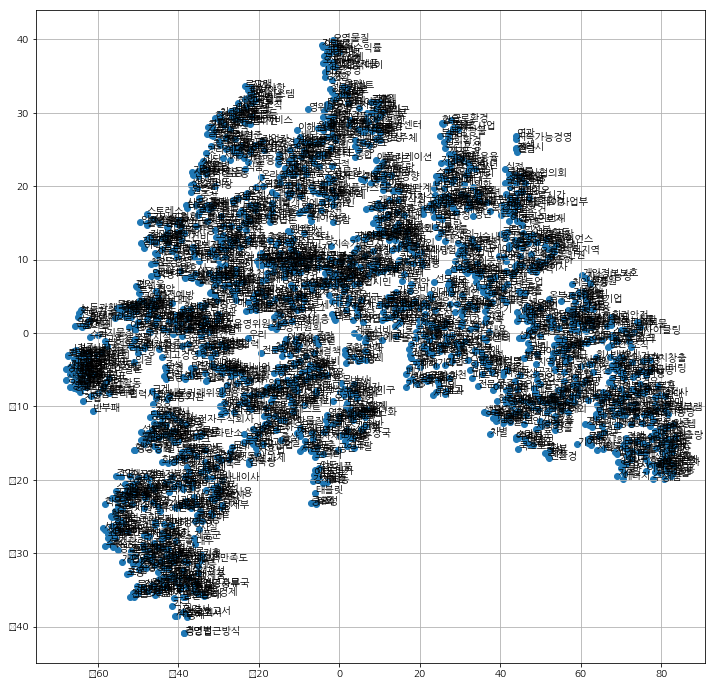

In [12]:
%matplotlib inline
from matplotlib import rc
rc('font', family=['NanumGothic','Malgun Gothic'])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.grid(True)